In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
import math

plt.style.use('ggplot')

#%matplotlib inline
#%matplotlib tk
#%matplotlib notebook

## 関数
```python:title
Flow(N, diffusivity, k_a, k_d, epsilon, length, time)
```
* 入力 : $N, D_{e}, k_{a}, k_{d}, \epsilon_{b}, L$ (スカラー), $t$ (numpy配列)
* 出力 : $t$と同じ次元のDimensional flow

`k_a=0, k_d=0`で $M=0$,それ以外で $M=1$ になる．

In [2]:
def p_n(n):
    return (n+0.5)*np.pi

def r_plus(p_n, k_a, k_d):
    return ( -(p_n**2 + k_a + k_d)+np.sqrt((p_n**2 + k_a + k_d)**2 - 4*(p_n**2)*k_d) )/2.0

def r_minus(p_n, k_a, k_d):
    return ( -(p_n**2 + k_a + k_d)-np.sqrt((p_n**2 + k_a + k_d)**2 - 4*(p_n**2)*k_d) )/2.0

def A_n(p_n, r_plus, r_minus, k_a):
    return (r_plus + (p_n**2) + k_a)/(r_plus - r_minus)

def Flow(N, diffusivity, k_a, k_d, epsilon, length, time):
    dimensionless_time = time * diffusivity/(epsilon*length**2)
    r_flow = np.zeros(len(time))
    for n in range(N):
        pn = p_n(n); r_p = r_plus(p_n=pn, k_a=k_a, k_d=k_d); r_m = r_minus(p_n=pn, k_a=k_a, k_d=k_d)
        A = A_n(p_n=pn, r_plus=r_p, r_minus=r_m, k_a=k_a)
        r_flow += np.power(-1.0,n)*(2.0*n+1.0)*( A*np.exp(r_m*dimensionless_time)+(1.0-A)*np.exp(r_p*dimensionless_time) )
    r_flow *= np.pi
    r_flow *= diffusivity/(epsilon*np.power(length, 2))

    return r_flow

In [4]:
De, k_a, k_d = 1.5, 0., 0.
epsilon, length = 1.0, 35.0
sigma = 5.*10**-6

T= np.arange(1, 5001)

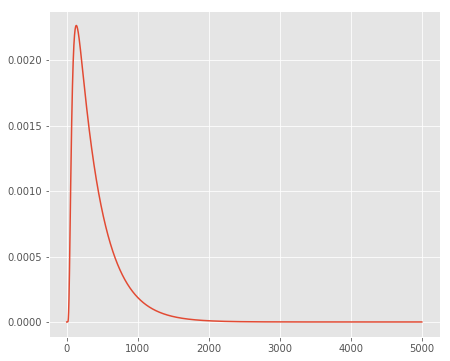

In [5]:
dimensional_flow = Flow(100, De, k_a, k_d, epsilon, length, T)

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111)

ax.plot(T, dimensional_flow)

ax.fill_between(T, dimensional_flow-sigma*dimensional_flow, dimensional_flow+sigma*dimensional_flow, alpha=0.7)

plt.show()

In [26]:
r_file = 'TAP_artificial_data_De=1.5_ka=0_kd=0_sigma=5e-6.dat'
data_points = 5000

g_noise = (1./(np.sqrt(2.*np.pi*(sigma**2)))) * np.exp(-1./(2.*sigma**2)*(dimensional_flow)**2)

dimensional_time = np.zeros(data_points)
dimensional_exit_flow = np.zeros(data_points)
i = 0
j = 0
for line in open(r_file, "r"):
    if i%(5000/data_points)==0:
        data = line.split("\t")
        dimensional_time[j] = data[0]
        dimensional_exit_flow[j] = data[1]
        j += 1
    else:
        pass
    i += 1


print(len(dimensional_time), "\t", len(dimensional_exit_flow))
# print(dimensional_time, dimensional_exit_flow)

fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111)
ax.plot(dimensional_time, dimensional_exit_flow)
ax.fill_between(T, -g_noise, g_noise, alpha=0.7)

ax.set_xlabel('Dimensional Time[ms]')
ax.set_ylabel('Dimensional Exit Flow[1/ms]')

plt.show()

5000 	 5000


[ -2.03257909e-17  -9.12059239e-18  -7.23334300e-18 ...,   1.06424963e-09
   1.06103905e-09   1.05783817e-09]


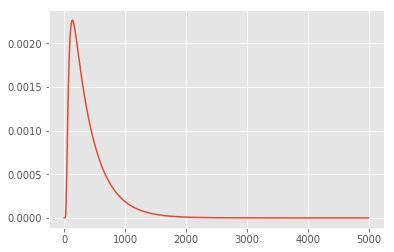

In [148]:
hoge = Flow(65, De, k_a, k_d, epsilon, length, T)

print(hoge)
plt.plot(T, hoge)
plt.show()

## 相対誤差

* 横軸 N
* 縦軸 誤差

\begin{align}
    Error = \frac{\left| F^{n=M+1}_t - F^{n=M}_t \right|}{F^{n=M}_t}
\end{align}

In [64]:
De, k_a, k_d = 1.5, 0., 0.
epsilon, length = 1.0, 35.0

N = np.arange(101)
print(N.shape[0])
err = np.array([1.*10**-3, 1.*10**-4, 1.*10**-5])
T= np.arange(1, 5001)

101


In [66]:
flow = []

for i in range(N.shape[0]):
    flow.append('flow{}'.format(i))
    
print(flow)

['flow0', 'flow1', 'flow2', 'flow3', 'flow4', 'flow5', 'flow6', 'flow7', 'flow8', 'flow9', 'flow10', 'flow11', 'flow12', 'flow13', 'flow14', 'flow15', 'flow16', 'flow17', 'flow18', 'flow19', 'flow20', 'flow21', 'flow22', 'flow23', 'flow24', 'flow25', 'flow26', 'flow27', 'flow28', 'flow29', 'flow30', 'flow31', 'flow32', 'flow33', 'flow34', 'flow35', 'flow36', 'flow37', 'flow38', 'flow39', 'flow40', 'flow41', 'flow42', 'flow43', 'flow44', 'flow45', 'flow46', 'flow47', 'flow48', 'flow49', 'flow50', 'flow51', 'flow52', 'flow53', 'flow54', 'flow55', 'flow56', 'flow57', 'flow58', 'flow59', 'flow60', 'flow61', 'flow62', 'flow63', 'flow64', 'flow65', 'flow66', 'flow67', 'flow68', 'flow69', 'flow70', 'flow71', 'flow72', 'flow73', 'flow74', 'flow75', 'flow76', 'flow77', 'flow78', 'flow79', 'flow80', 'flow81', 'flow82', 'flow83', 'flow84', 'flow85', 'flow86', 'flow87', 'flow88', 'flow89', 'flow90', 'flow91', 'flow92', 'flow93', 'flow94', 'flow95', 'flow96', 'flow97', 'flow98', 'flow99', 'flow100'

In [67]:
for i in range(N.shape[0]):
    flow[i] = Flow(N[i], De, k_a, k_d, epsilon, length, T)

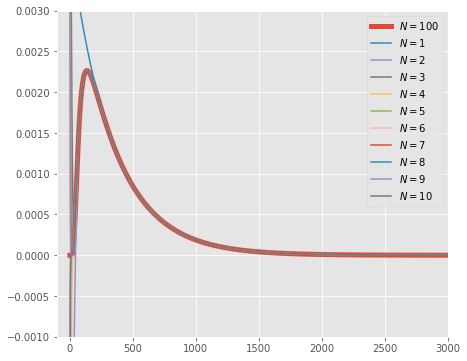

In [140]:
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111)

ax.plot(T, flow[100], label='$N=$100', linewidth=5)

for i in range(1, 11):
    ax.plot(T, flow[i], label='$N={}$'.format(N[i]))

    
ax.set_xlim(-100, 3000)
ax.set_ylim(-0.001, 0.003)
plt.legend(loc='upper right')

w_file = 'teireikai20181017_1.png'
plt.savefig(w_file)
plt.show()

In [69]:
soutaigosa = np.zeros([N.shape[0]-1, T.shape[0]])

In [70]:
print(soutaigosa.shape)

(100, 5000)


In [71]:
for n in range(N.shape[0]-1):
    for t in range(T.shape[0]):
        soutaigosa[n][t] = np.abs(flow[n+1][t]-flow[n][t])/flow[n][t]
        
print(soutaigosa)

C:\Users\anbaigashi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


[[        inf         inf         inf ...,         inf         inf
          inf]
 [ 2.92835792  2.8584267   2.79016549 ...,  0.          0.          0.        ]
 [-2.4115211  -2.32724435 -2.24699936 ...,  0.          0.          0.        ]
 ..., 
 [-0.         -0.         -0.         ...,  0.          0.          0.        ]
 [-0.         -0.         -0.         ...,  0.          0.          0.        ]
 [-0.         -0.         -0.         ...,  0.          0.          0.        ]]


[  1  10  20  30  40  50  60  70  80  90 100]
(11,)


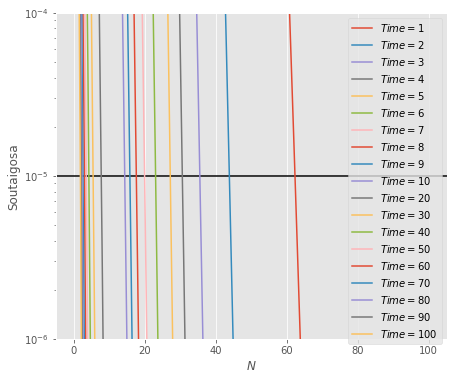

In [144]:
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111)

#Time = 3
Time = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

hyoji = np.arange(0, 101, 10)
hyoji[0] = 1
print(hyoji)
print(hyoji.shape)

#for i in range(hyoji.shape[0]-1):
#    ax.scatter(hyoji[i], soutaigosa[hyoji[i]][Time-1], label='N={}'.format(hyoji[i]))
#    print(soutaigosa[hyoji[i]][Time-1])

for t in Time:
    ax.plot(np.abs(soutaigosa[1:, t-1]), label='$Time=${}'.format(t))

xmin, xmax = -5, 105
ymin, ymax = 10**-6, 10**-4

ax.hlines(10**-5, xmin, xmax)
    
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_xlabel('$N$')
ax.set_ylabel('Soutaigosa')
ax.set_yscale('log')
plt.legend()

# w_file = 'soutaigosa_Time_2.png'
# plt.savefig(w_file)

plt.show()

In [111]:
print(soutaigosa[1:, 1])

[  2.85842670e+00  -2.32724435e+00   2.12342317e+00  -2.00290738e+00
   1.91681078e+00  -1.84877914e+00   1.79175605e+00  -1.74217427e+00
   1.69801934e+00  -1.65805498e+00   1.62147087e+00  -1.58770647e+00
   1.55635609e+00  -1.52711461e+00   1.49974477e+00  -1.47405683e+00
   1.44989521e+00  -1.42712964e+00   1.40564905e+00  -1.38535729e+00
   1.36616995e+00  -1.34801215e+00   1.33081679e+00  -1.31452328e+00
   1.29907649e+00  -1.28442599e+00   1.27052545e+00  -1.25733198e+00
   1.24480610e+00  -1.23291024e+00   1.22161277e+00  -1.21086954e+00
   1.20070558e+00  -1.19082723e+00   1.18255364e+00  -1.16870217e+00
   1.18997103e+00  -1.02446963e+00   6.51980323e+00  -1.75146328e-01
  -2.99816285e-02  -3.91390609e-03  -5.03110618e-04  -6.13156352e-05
  -7.12050000e-06  -7.87437337e-07  -8.29334738e-08  -8.31872196e-09
  -7.94702294e-10  -7.23070461e-11  -6.26596085e-12  -5.17264427e-13
  -4.05432601e-14  -3.04074451e-15  -1.68930250e-16  -0.00000000e+00
  -0.00000000e+00  -0.00000000e+00

In [147]:
print(soutaigosa[60:, 0])

[ -1.40717102e-03  -3.27910441e-04  -7.44385197e-05  -1.64970631e-05
  -3.56755957e-06  -7.52909963e-07  -1.55065306e-07  -3.11667356e-08
  -6.11329702e-09  -1.17022673e-09  -2.18613714e-10  -3.98565796e-11
  -7.09146273e-12  -1.23148520e-12  -2.08759710e-13  -3.44142731e-14
  -5.45777019e-15  -9.09628364e-16  -1.51604727e-16  -0.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00]


# フローの理論曲線高速化

## 関数
```python:title
Flow(diffusivity, k_a, k_d, epsilon, length, time)
```
* 入力 : $D_{e}, k_{a}, k_{d}, \epsilon_{b}, L$ (スカラー), $t$ (numpy配列)
* 出力 : $t$と同じ次元のDimensional flow

`k_a=0, k_d=0`で $M=0$,それ以外で $M=1$ になる．

In [ ]:
def p_n(n):
    return (n+0.5)*np.pi

def r_plus(p_n, k_a, k_d):
    return ( -(p_n**2 + k_a + k_d)+np.sqrt((p_n**2 + k_a + k_d)**2 - 4*(p_n**2)*k_d) )/2.0

def r_minus(p_n, k_a, k_d):
    return ( -(p_n**2 + k_a + k_d)-np.sqrt((p_n**2 + k_a + k_d)**2 - 4*(p_n**2)*k_d) )/2.0

def A_n(p_n, r_plus, r_minus, k_a):
    return (r_plus + (p_n**2) + k_a)/(r_plus - r_minus)

def Flow(diffusivity, k_a, k_d, epsilon, length, time):
    dimensionless_time = time * diffusivity/(epsilon*length**2)
    
    f_flow = np.zeros(time.shape[0])
    pn = p_n(0); r_p = r_plus(p_n=pn, k_a=k_a, k_d=k_d); r_m = r_minus(p_n=pn, k_a=k_a, k_d=k_d)
    A = A_n(p_n=pn, r_plus=r_p, r_minus=r_m, k_a=k_a)
    f_flow += np.power(-1.0, 0)*(2.0*0+1.0)*( A*np.exp(r_m*dimensionless_time)+(1.0-A)*np.exp(r_p*dimensionless_time) )
    
    l_flow = np.zeros(time.shape[0])
    pn = p_n(1); r_p = r_plus(p_n=pn, k_a=k_a, k_d=k_d); r_m = r_minus(p_n=pn, k_a=k_a, k_d=k_d)
    A = A_n(p_n=pn, r_plus=r_p, r_minus=r_m, k_a=k_a)
    l_flow = f_flow + np.power(-1.0, 1)*(2.0*1+1.0)*( A*np.exp(r_m*dimensionless_time)+(1.0-A)*np.exp(r_p*dimensionless_time) )
    
    N = np.ones(time.shape[0], dtype=int)
    
    while np.abs((l_flow[0]-f_flow[0])/f_flow[0]) > 10**-5:
        for i in range(time.shape[0]):
            if np.abs((l_flow[i]-f_flow[i])/f_flow[i]) > 1.*10**-5:
                N[i] += 1
                f_flow[i] = l_flow[i]
                pn = p_n(N[i]); r_p = r_plus(p_n=pn, k_a=k_a, k_d=k_d); r_m = r_minus(p_n=pn, k_a=k_a, k_d=k_d)
                A = A_n(p_n=pn, r_plus=r_p, r_minus=r_m, k_a=k_a)
                l_flow[i] += np.power(-1.0, N[i])*(2.0*N[i]+1.0)*( A*np.exp(r_m*dimensionless_time[i])+(1.0-A)*np.exp(r_p*dimensionless_time[i]) )
    
#    print(N)
    l_flow *= np.pi
    l_flow *= diffusivity/(epsilon*np.power(length, 2))

    return l_flow